# MNIST with PyTorch

In [24]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**STEPS:**  
1. Convert data to correct images size
2. Create TrainLoader instance
3. Define model
4. Define hyperparameters
5. Train model
5. Test the model

## Load data and transform it to correct input shape

In [4]:
# Load the dataset
df = pd.read_csv("../data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [21]:
def convert_df_to_xy(df: pd.DataFrame) -> torch.IntTensor and torch.IntTensor:
    """Converts a Pandas DataFrame to 2 torch.IntTensor (x & y) so that you can later apply any function.
    The df needs to have shape (N, 785) where N: number of samples and 785: target + 784 pixels (28x28)

    Args:
        df (pd.DataFrame): The images data you will work with

    Returns:
        torch.IntTensor: x
        torch.IntTensor: y
    """

    number_of_samples = df.shape[0]
    X_train = None
    y_train = None
    
    # get the labels
    labels = df['label'].to_numpy()
    y_train = torch.IntTensor(labels).reshape(number_of_samples, 1)

    # convert the rest of dataframe to correct image size (28x28)
    pixels = df[[col for col in df.columns if col != 'label']].to_numpy()
    X_train = torch.IntTensor(pixels).reshape(number_of_samples, 1, 28, 28)

    return X_train, y_train



In [22]:
X_train, y_train = convert_df_to_xy(df=df)

print(f"y_train shape: {y_train.shape}")
print(f"X_train shape: {X_train.shape}")

y_train shape: torch.Size([42000, 1])
X_train shape: torch.Size([42000, 1, 28, 28])


### Plot one image to see if it is correct

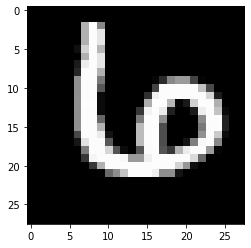

In [33]:
image_to_plot = 756

# plot the sample
fig = plt.figure
plt.imshow(X_train[image_to_plot][0], cmap='gray')
plt.show()